<a href="https://colab.research.google.com/github/emarevalog/Fundamentos_de_programaci-n/blob/main/Exploraci%C3%B3n_estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploración de datos

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from google.colab import drive

# Montar Google Driv
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Carga del dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Monografía/datos_arbei/Datos_monografía.xlsx', header = 0)

In [25]:
print(df)

         date      ndvi  precipitation  real_evapotranspiration  interception  \
0  2013-01-01  0.668057      14.795760                67.777152      6.616557   
1  2013-02-01  0.594504     109.739020                67.710569     20.110346   
2  2013-03-01  0.637496     122.638363                84.763105     25.720141   
3  2013-04-01  0.651578     198.530119               109.409384      2.627605   
4  2013-05-01  0.766817     328.514942               113.587322      3.724465   
..        ...       ...            ...                      ...           ...   
91 2020-08-01  0.746717     191.824661               132.663656     26.843803   
92 2020-09-01  0.776158     235.980345               126.817202     33.339521   
93 2020-10-01  0.782027     221.834847               142.040391     31.471432   
94 2020-11-01  0.772937     240.768590               108.288917     30.839614   
95 2020-12-01  0.769412     137.833040               100.368586     26.939362   

    potential_evapotranspir

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          96 non-null     datetime64[ns]
 1   ndvi                          96 non-null     float64       
 2   precipitation                 96 non-null     float64       
 3   real_evapotranspiration       96 non-null     float64       
 4   interception                  96 non-null     float64       
 5   potential_evapotranspiration  96 non-null     float64       
 6   soil_moisture                 96 non-null     float64       
 7   recharge                      96 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 6.1 KB


In [27]:
df.describe()

,date,ndvi,precipitation,real_evapotranspiration,interception,potential_evapotranspiration,soil_moisture,recharge
count,96,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,2016-12-15 17:00:00,0.718484,152.939872,107.602642,21.938173,148.237226,6775.581347,12.263074
min,2013-01-01 00:00:00,0.507693,14.795760,55.873611,1.924262,69.065290,2524.892458,0.002570
25%,2014-12-24 06:00:00,0.680992,107.752661,99.362773,15.799435,139.663264,5277.845832,0.679930
50%,2016-12-16 12:00:00,0.742779,142.835718,110.129264,24.107704,147.714306,6629.215171,3.914425
75%,2018-12-08 18:00:00,0.766414,211.338201,120.669349,30.882808,158.720574,8519.760712,17.937855
max,2020-12-01 00:00:00,0.798472,364.757331,142.040391,36.480872,185.793053,9919.101253,116.139752
std,NaN,0.063083,72.459348,17.822530,10.622865,17.011936,1912.496048,19.240371


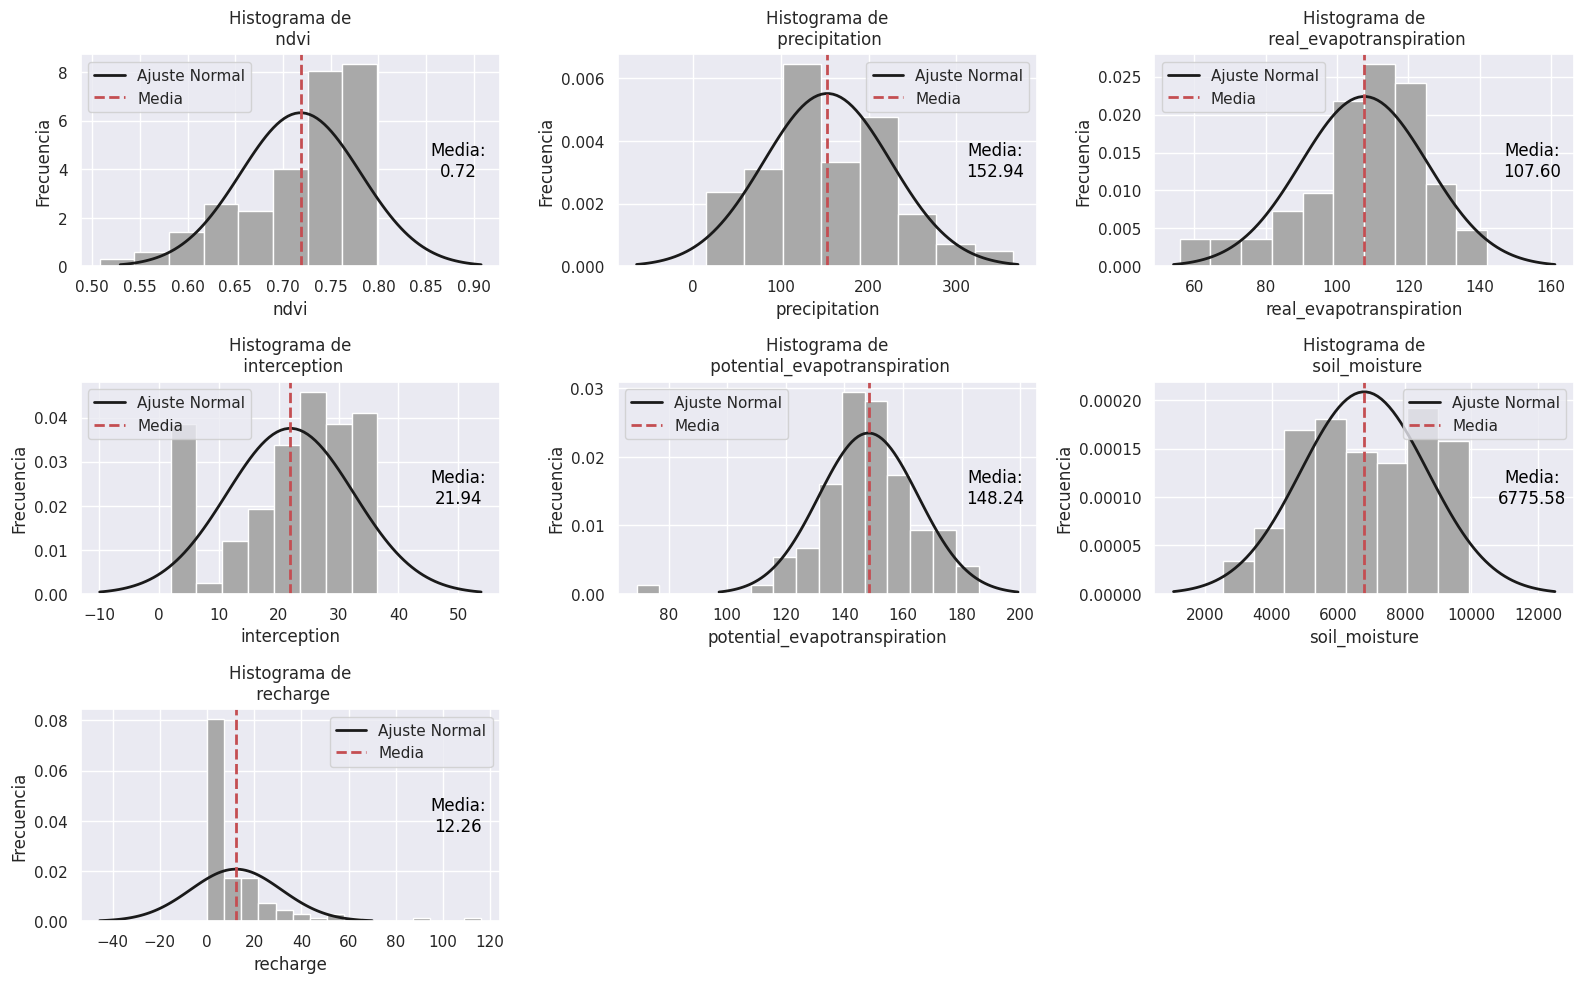

In [28]:
variables = ['ndvi', 'precipitation', 'real_evapotranspiration','interception', 'potential_evapotranspiration', 'soil_moisture','recharge']

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 10))
bar_color = 'darkgray'

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Media y desviación estandar
    mu, std = df[variable].mean(), df[variable].std()

    # Rango de valores para la curva de mejor ajuste
    x_values = np.linspace(mu - 3 * std, mu + 3 * std, 100)

    # Curva de densidad de probabilidad (PDF) utilizando una distribución normal
    pdf = norm.pdf(x_values, mu, std)

    ax.hist(df[variable], bins="auto", density=True, cumulative=False, color=bar_color)
    ax.plot(x_values, pdf, 'k-', lw=2, label='Ajuste Normal')
    ax.axvline(mu, color='r', linestyle='dashed', linewidth=2, label='Media')
    ax.text(0.9, 0.5, f'Media:\n{mu:.2f}', transform=ax.transAxes, ha='center', va='center', color='black')

    ax.set_title(f'Histograma de\n {variable}', y=1.01)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Elimina cualquier eje no utilizado
for i in range(len(variables), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

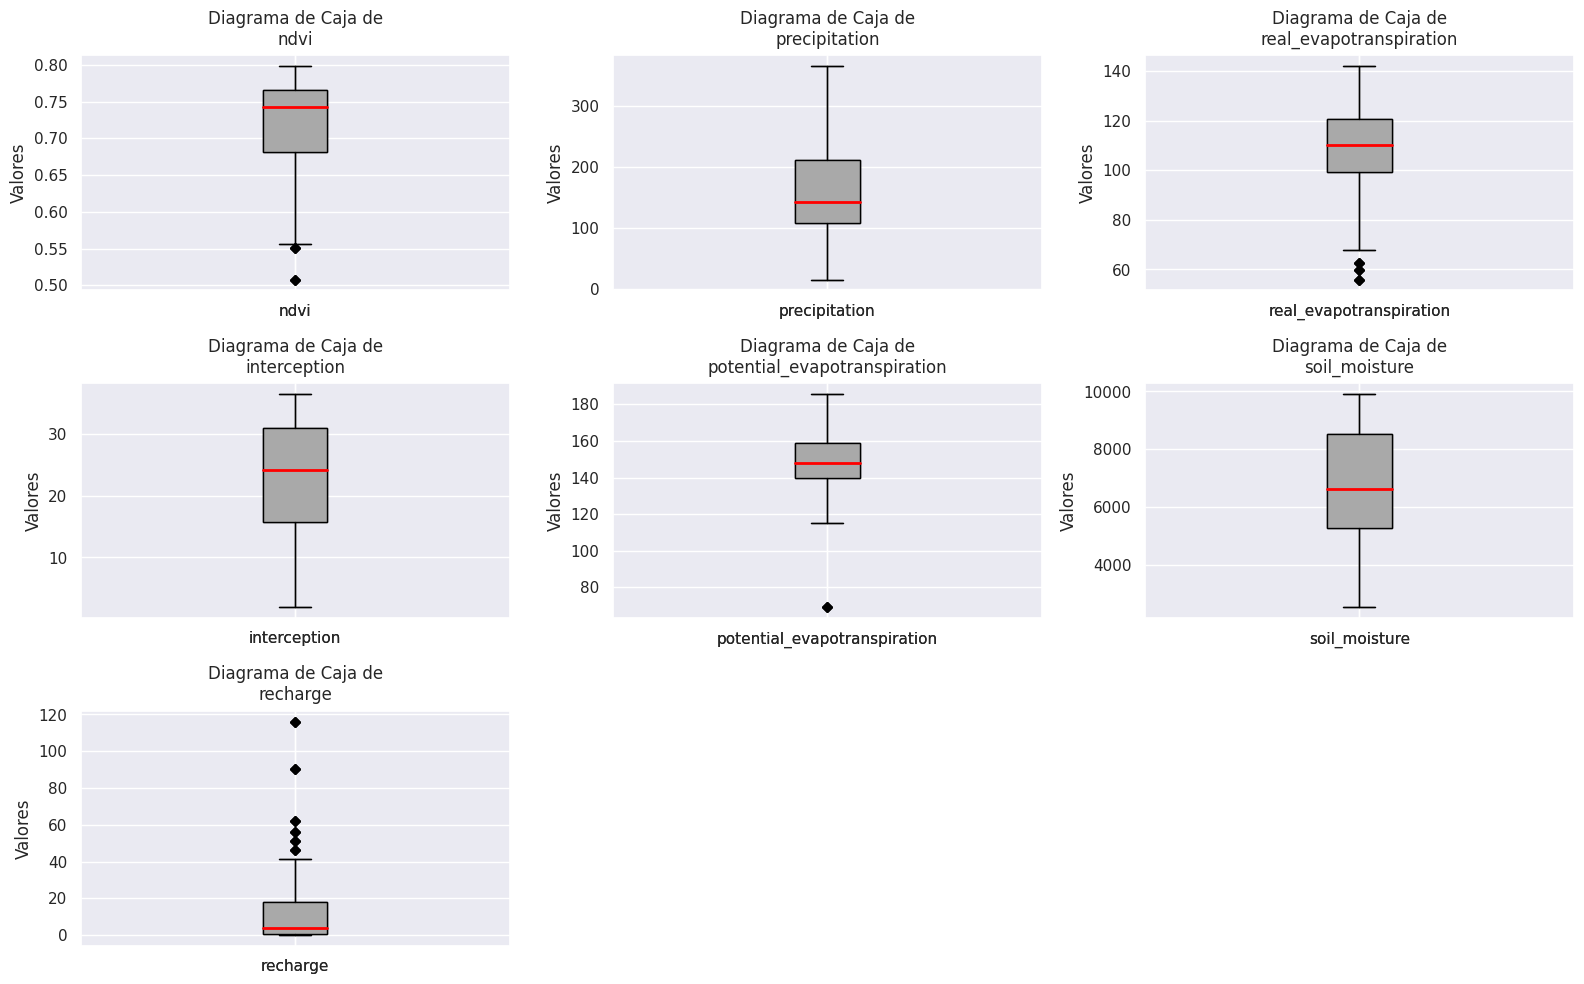

In [9]:
#Diagramas de cajas
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    boxprops = dict(facecolor='#A9A9A9', color='black')
    flierprops = dict(marker='D', markerfacecolor='black', markersize=5)

    ax.boxplot(df[variable], vert=True, labels=[variable], patch_artist=True,boxprops=boxprops, flierprops=flierprops)
    medianprops = dict(linewidth=2, color='red')
    ax.boxplot(df[variable], vert=True, labels=[variable], patch_artist=True,boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
    ax.set_title(f'Diagrama de Caja de\n{variable}', y=1.01)
    ax.set_ylabel('Valores')

# Elimina cualquier eje no utilizado
for i in range(len(variables), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()


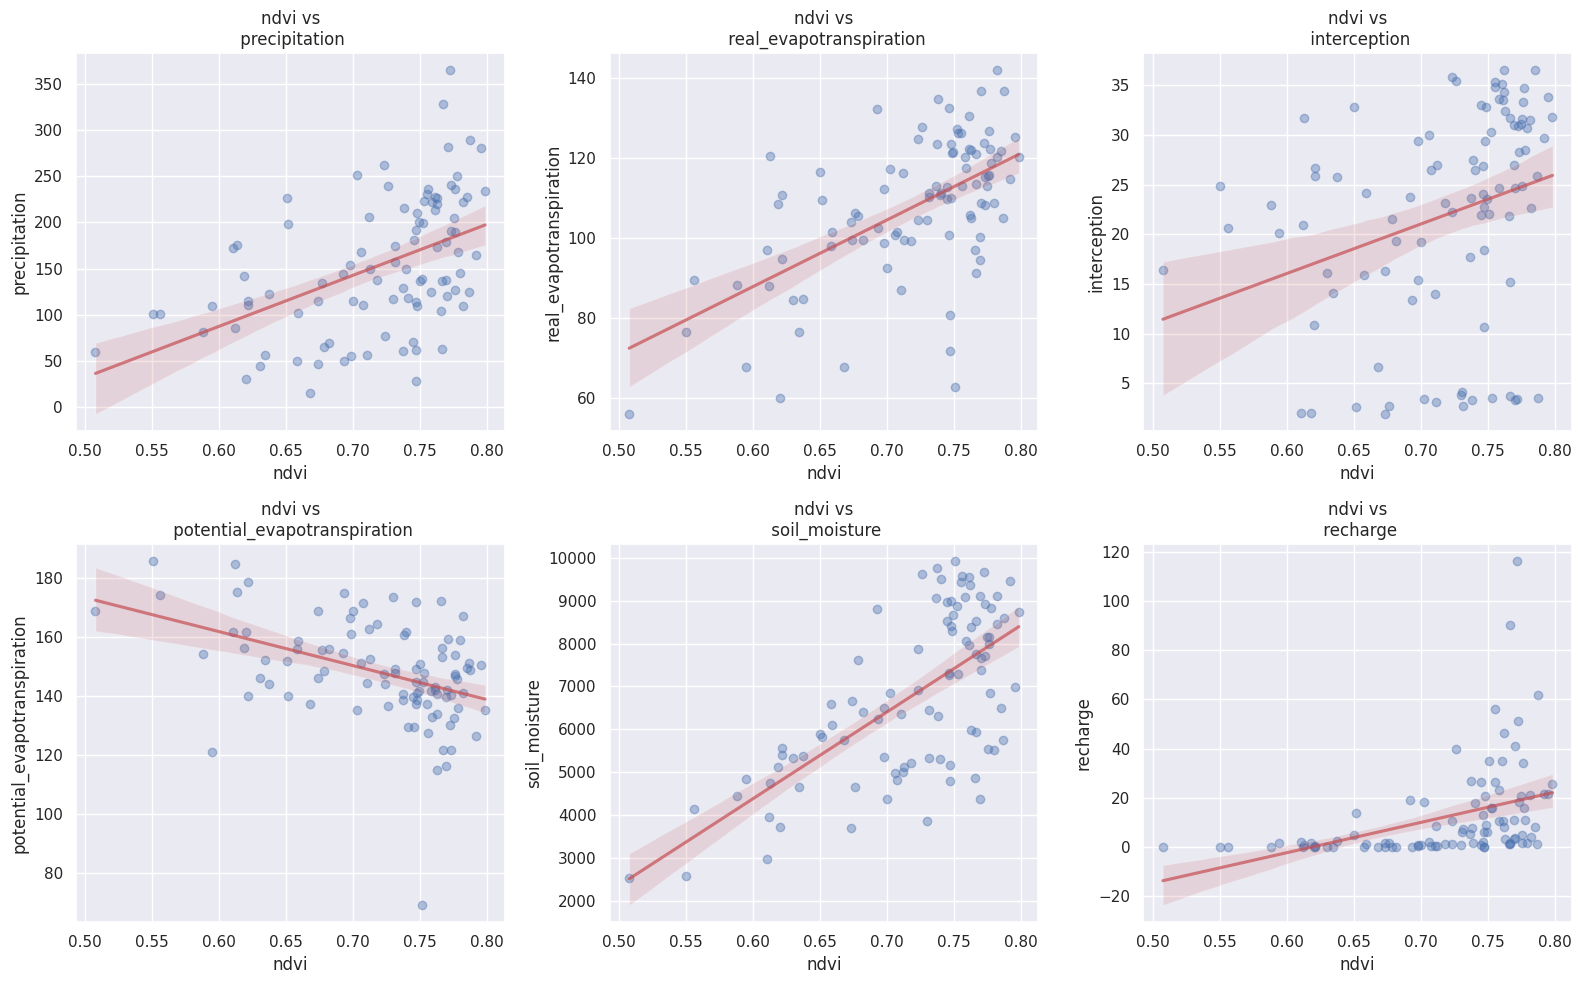

In [10]:
# Gráficos de dispersión
x = 'ndvi'
y_variables = ['precipitation', 'real_evapotranspiration','interception', 'potential_evapotranspiration', 'soil_moisture','recharge']

plt.figure(figsize=(16, 10))
palette = sns.color_palette('hsv', len(y_variables))

for i, (y, color) in enumerate(zip(y_variables, palette), 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=x, y=y, data=df, scatter_kws={"alpha": 0.4}, line_kws={"color": "r", "alpha": 0.7})
    plt.title(f'{x} vs\n {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()

plt.show()

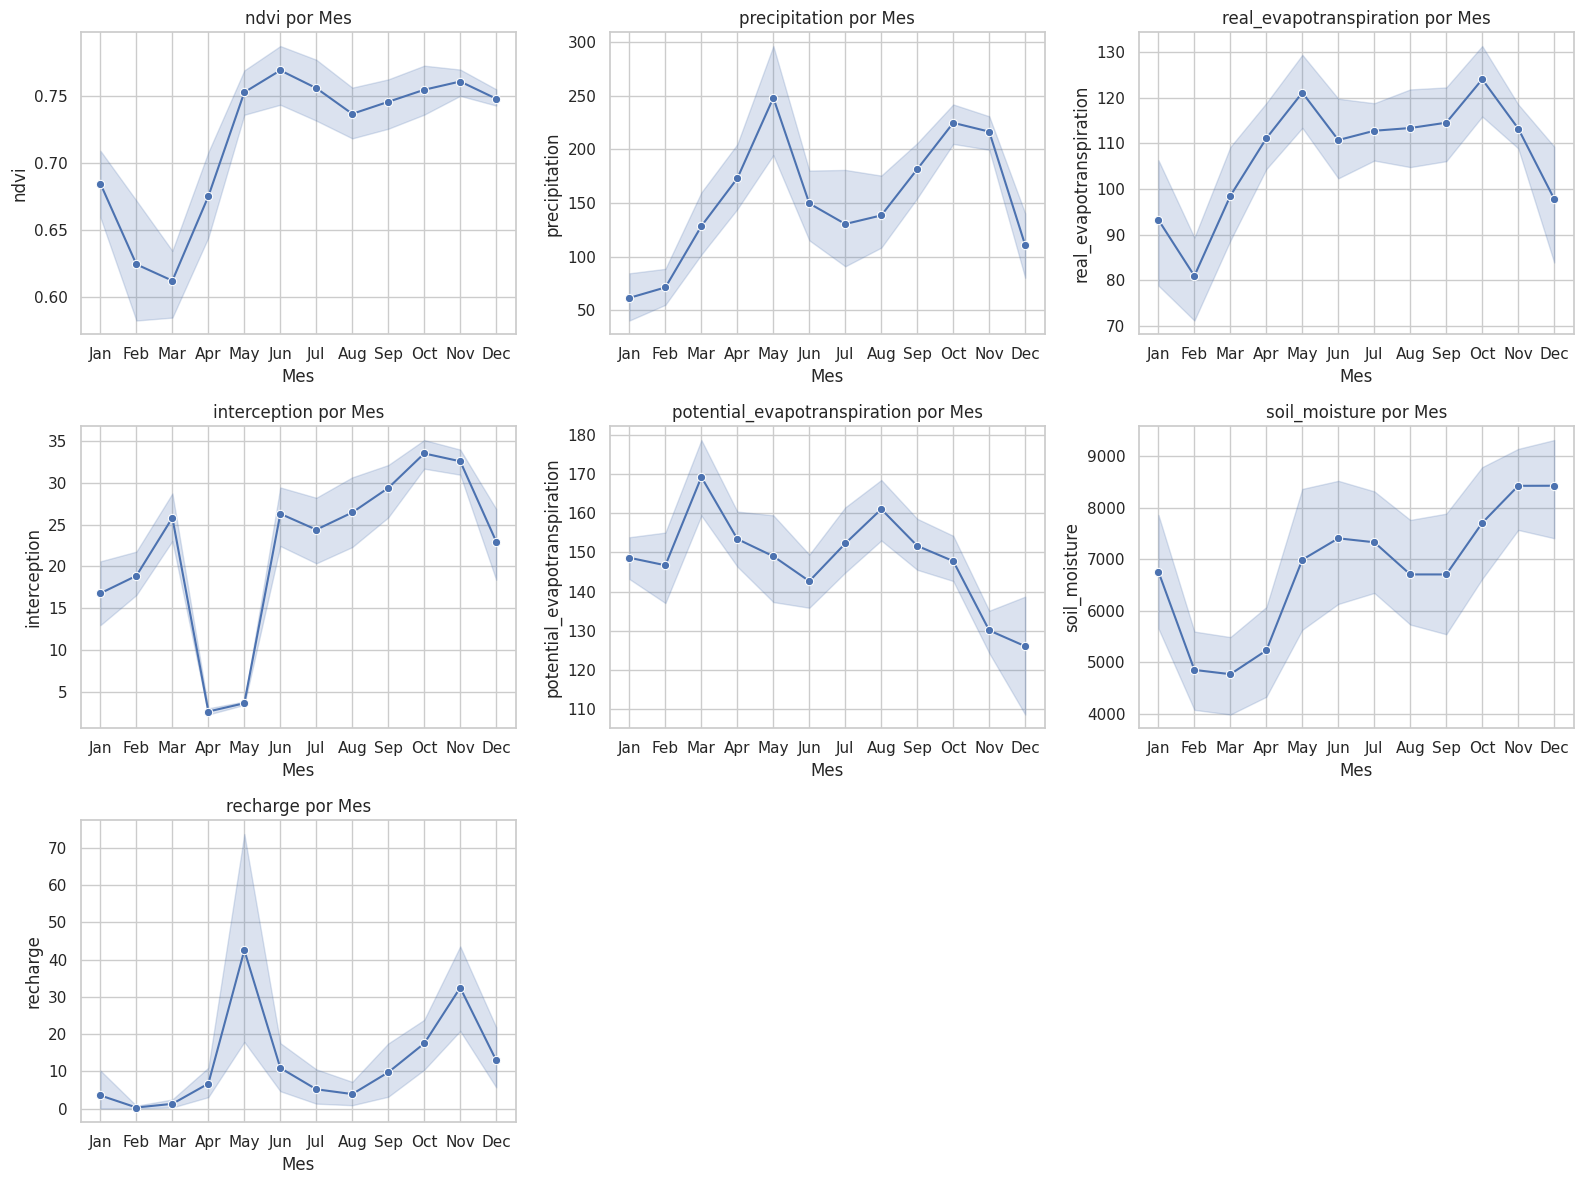

In [11]:
# Graficos de lineas
df['date'] = pd.to_datetime(df['date'])
df['Mes'] = df['date'].dt.strftime('%b')

variables = ['ndvi', 'precipitation', 'real_evapotranspiration', 'interception',
             'potential_evapotranspiration', 'soil_moisture', 'recharge']


sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Gráfico de línea
    sns.lineplot(data=df, x='Mes', y=variable, ax=ax, marker='o')

    ax.set_title(f'{variable} por Mes')
    ax.set_xlabel('Mes')
    ax.set_ylabel(variable)

# Elimina cualquier eje no utilizado
for i in range(len(variables), 9):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

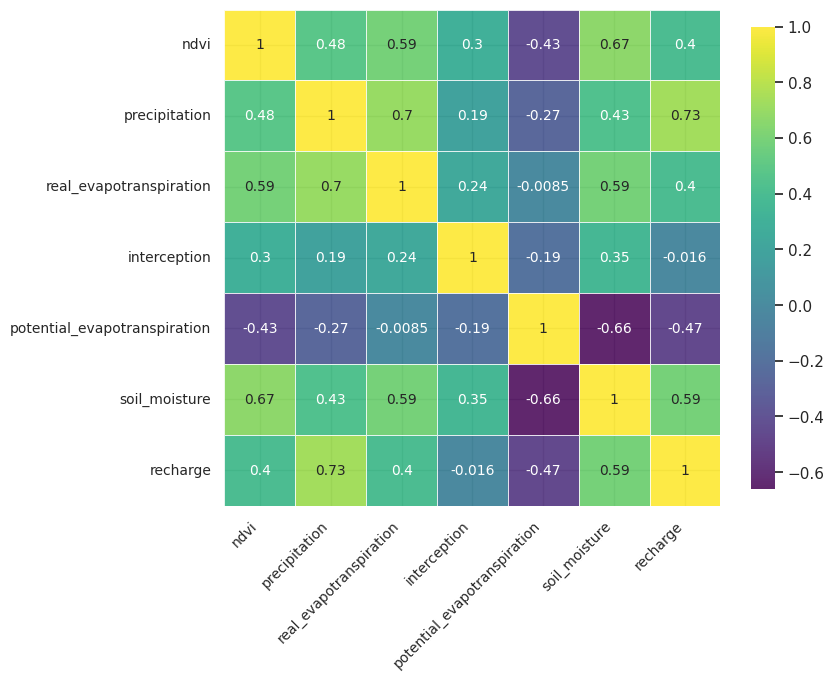

In [22]:
# Matiz de correlación
df_numeric = df[variables]

matriz_correlacion = df_numeric.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='viridis', linewidths=0.5, square=True,
            cbar_kws={"shrink": 0.75}, annot_kws={"size": 10}, alpha=0.85)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.show()